In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
data = pd.read_csv("fitness_tracker_dataset.csv")
data

,user_id,date,steps,calories_burned,distance_km,active_minutes,sleep_hours,heart_rate_avg,workout_type,weather_conditions,location,mood
0,468,2023-01-01,4530,2543.02,16.10,613,1.5,176,Walking,Clear,Park,Tired
1,879,2023-01-01,11613,1720.76,8.10,352,6.3,128,Cycling,Fog,Park,Happy
2,152,2023-01-01,27335,1706.35,3.57,236,6.7,134,Yoga,Snow,Park,Neutral
3,311,2023-01-01,13459,2912.38,6.41,1329,11.6,116,Swimming,Rain,Office,Tired
4,759,2023-01-01,15378,3344.51,17.88,52,7.4,84,Swimming,Rain,Office,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,294,2025-09-26,21883,1711.42,4.62,124,7.9,174,Running,Fog,Other,Tired
999996,114,2025-09-26,15451,3961.63,1.93,1316,7.4,161,Cycling,Clear,Park,Tired
999997,85,2025-09-26,17912,3604.77,5.81,187,7.1,74,Swimming,Fog,Gym,Neutral
999998,109,2025-09-26,10072,2724.34,7.42,1203,6.0,74,Swimming,Snow,Gym,Tired


In [73]:
avg_calories_by_workout = data.groupby('workout_type')['calories_burned'].mean().sort_values() - data['calories_burned'].mean()

In [74]:
avg_calories_by_workout

workout_type
Gym Workout   -0.729016
Cycling       -0.318515
Yoga           0.404782
Running        0.630654
Walking        1.348287
Swimming       2.640091
Name: calories_burned, dtype: float64

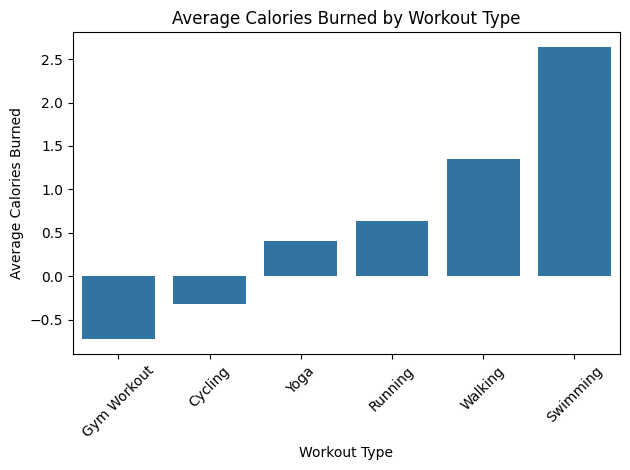

In [75]:
sns.barplot(x=avg_calories_by_workout.index, y=avg_calories_by_workout.values)
plt.title('Average Calories Burned by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Average Calories Burned')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [76]:
numerical_data = data.select_dtypes(include=['int', 'float'])
numerical_data.drop('user_id', axis=1, inplace=True)
numerical_data

,steps,calories_burned,distance_km,active_minutes,sleep_hours,heart_rate_avg
0,4530,2543.02,16.10,613,1.5,176
1,11613,1720.76,8.10,352,6.3,128
2,27335,1706.35,3.57,236,6.7,134
3,13459,2912.38,6.41,1329,11.6,116
4,15378,3344.51,17.88,52,7.4,84
...,...,...,...,...,...,...
999995,21883,1711.42,4.62,124,7.9,174
999996,15451,3961.63,1.93,1316,7.4,161
999997,17912,3604.77,5.81,187,7.1,74
999998,10072,2724.34,7.42,1203,6.0,74


In [77]:
avg_steps = data['steps'].mean()
avg_calo = data['calories_burned'].mean()
print(avg_steps)
print(avg_calo)

15005.767061
2750.0081479199994


In [78]:
avg_calo/avg_steps

0.18326341710763142

In [79]:
correlation_matrix = numerical_data.corr()
correlation_matrix

,steps,calories_burned,distance_km,active_minutes,sleep_hours,heart_rate_avg
steps,1.000000,0.000039,0.000752,-0.000199,-0.000902,-0.001565
calories_burned,0.000039,1.000000,-0.000019,0.000416,-0.001989,-0.000288
distance_km,0.000752,-0.000019,1.000000,0.001858,0.000385,-0.000103
active_minutes,-0.000199,0.000416,0.001858,1.000000,-0.000442,0.001320
sleep_hours,-0.000902,-0.001989,0.000385,-0.000442,1.000000,-0.000300
heart_rate_avg,-0.001565,-0.000288,-0.000103,0.001320,-0.000300,1.000000


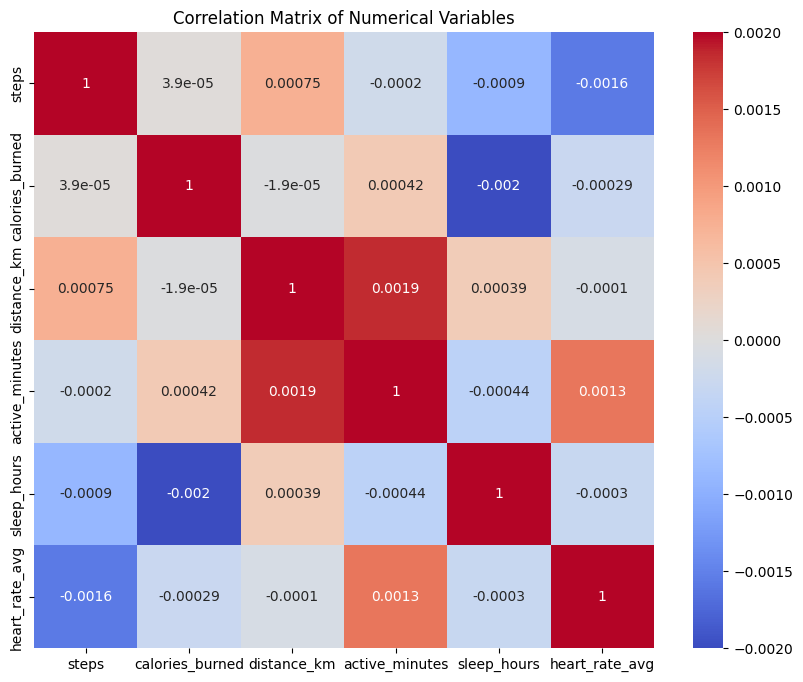

In [80]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-0.002, vmax=0.002)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [81]:
avg_steps_by_location = data.groupby('location')['steps'].mean().sort_values() - data['steps'].mean()
avg_steps_by_location

location
Home     -31.928812
Office    -4.403454
Park       3.635521
Gym       14.400862
Other     18.407793
Name: steps, dtype: float64

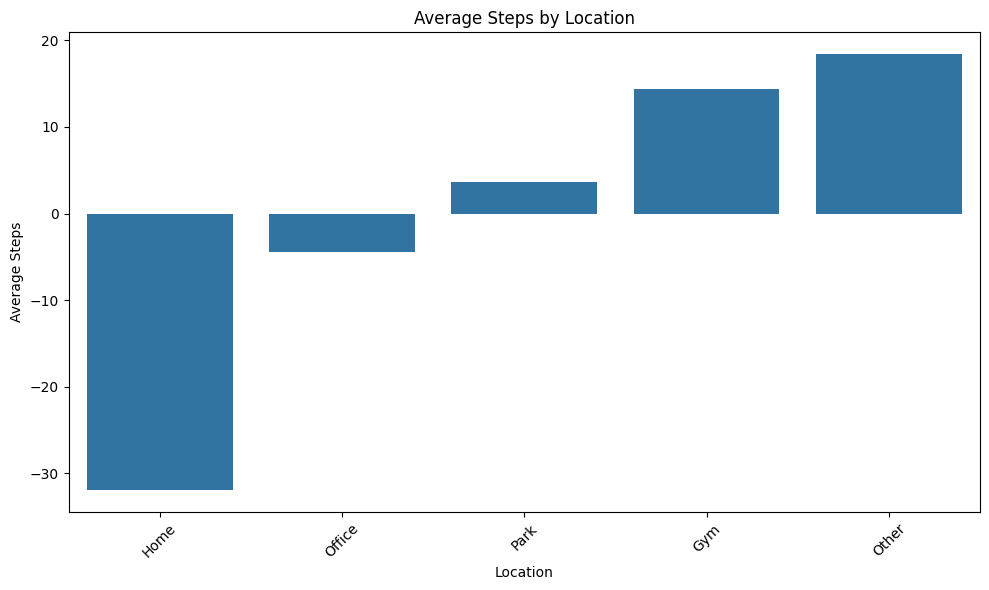

In [82]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_steps_by_location.index, y=avg_steps_by_location.values)
plt.title('Average Steps by Location')
plt.xlabel('Location')
plt.ylabel('Average Steps')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [83]:
data

,user_id,date,steps,calories_burned,distance_km,active_minutes,sleep_hours,heart_rate_avg,workout_type,weather_conditions,location,mood
0,468,2023-01-01,4530,2543.02,16.10,613,1.5,176,Walking,Clear,Park,Tired
1,879,2023-01-01,11613,1720.76,8.10,352,6.3,128,Cycling,Fog,Park,Happy
2,152,2023-01-01,27335,1706.35,3.57,236,6.7,134,Yoga,Snow,Park,Neutral
3,311,2023-01-01,13459,2912.38,6.41,1329,11.6,116,Swimming,Rain,Office,Tired
4,759,2023-01-01,15378,3344.51,17.88,52,7.4,84,Swimming,Rain,Office,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,294,2025-09-26,21883,1711.42,4.62,124,7.9,174,Running,Fog,Other,Tired
999996,114,2025-09-26,15451,3961.63,1.93,1316,7.4,161,Cycling,Clear,Park,Tired
999997,85,2025-09-26,17912,3604.77,5.81,187,7.1,74,Swimming,Fog,Gym,Neutral
999998,109,2025-09-26,10072,2724.34,7.42,1203,6.0,74,Swimming,Snow,Gym,Tired


In [84]:
if 'date' not in data.columns:
    raise ValueError("The 'date' column is missing from the data.")

# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Drop rows with NaT in 'date' due to conversion errors
data.dropna(subset=['date'], inplace=True)

In [85]:
seasons = {
    'Winter': [12, 1, 2],
    'Spring': [3, 4, 5],
    'Summer': [6, 7, 8],
    'Fall': [9, 10, 11]
}

# Create a new column for the season
data['season'] = data['date'].dt.month.map(lambda x: next((season for season, months in seasons.items() if x in months), None))
data

,user_id,date,steps,calories_burned,distance_km,active_minutes,sleep_hours,heart_rate_avg,workout_type,weather_conditions,location,mood,season
0,468,2023-01-01,4530,2543.02,16.10,613,1.5,176,Walking,Clear,Park,Tired,Winter
1,879,2023-01-01,11613,1720.76,8.10,352,6.3,128,Cycling,Fog,Park,Happy,Winter
2,152,2023-01-01,27335,1706.35,3.57,236,6.7,134,Yoga,Snow,Park,Neutral,Winter
3,311,2023-01-01,13459,2912.38,6.41,1329,11.6,116,Swimming,Rain,Office,Tired,Winter
4,759,2023-01-01,15378,3344.51,17.88,52,7.4,84,Swimming,Rain,Office,Neutral,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,294,2025-09-26,21883,1711.42,4.62,124,7.9,174,Running,Fog,Other,Tired,Fall
999996,114,2025-09-26,15451,3961.63,1.93,1316,7.4,161,Cycling,Clear,Park,Tired,Fall
999997,85,2025-09-26,17912,3604.77,5.81,187,7.1,74,Swimming,Fog,Gym,Neutral,Fall
999998,109,2025-09-26,10072,2724.34,7.42,1203,6.0,74,Swimming,Snow,Gym,Tired,Fall


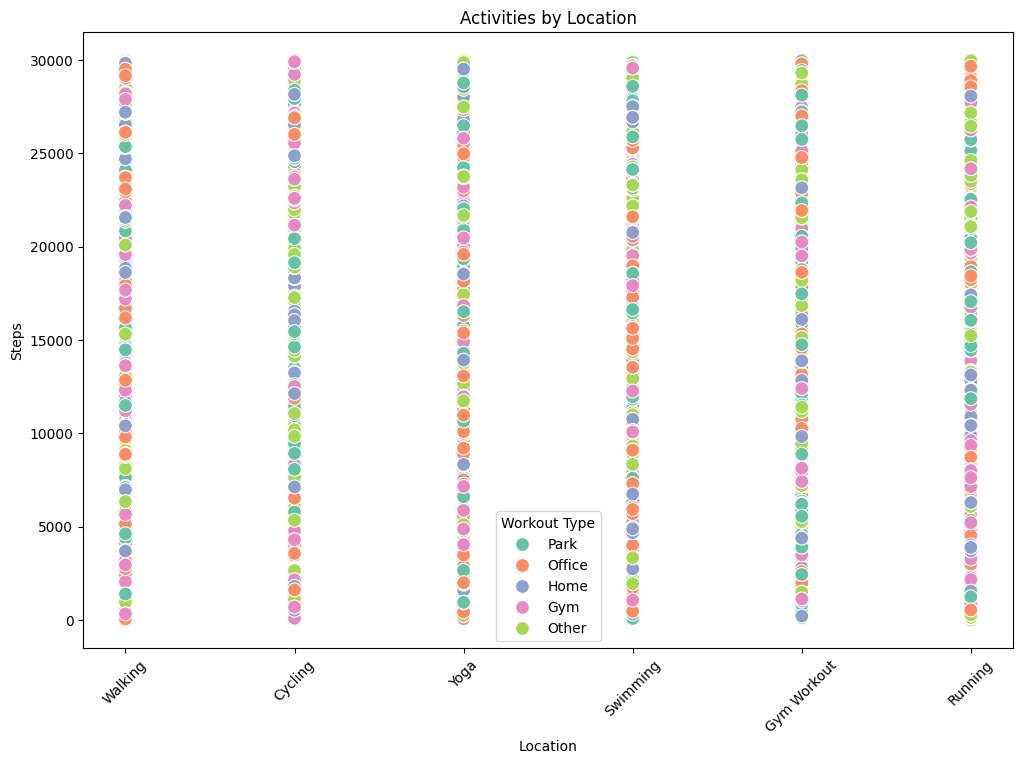

In [86]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='workout_type', y='steps', hue='location', data=data, palette='Set2', s=100)
plt.title('Activities by Location')
plt.xlabel('Location')
plt.ylabel('Steps')
plt.xticks(rotation=45)
plt.legend(title='Workout Type')

plt.show()

In [97]:
pd.pivot_table(data, values='steps', index='location', columns='workout_type', aggfunc='mean')

workout_type,Cycling,Gym Workout,Running,Swimming,Walking,Yoga
location,,,,,,
Gym,-52.836474,-18.858376,38.950413,5.717261,19.607164,35.868829
Home,-132.573792,11.567432,-17.329348,-5.836502,11.906872,-36.147048
Office,-76.079647,-31.571213,-18.061427,54.391976,3.278756,101.019680
Other,-67.726329,84.316952,23.797644,128.428390,-51.384364,-5.333712
Park,28.088269,3.949112,2.715807,-28.948649,18.247689,59.182227
